#### -------------------------- Rainfall Prediction Model---------------------------------------------

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_theme(style="darkgrid")

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#### Importing Dataset

In [2]:
data = pd.read_csv('weatherAUS.csv')

In [3]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192913,2021-03-26,Uluru,19.0,35.5,0.0,NaN,NaN,SW,44.0,WNW,...,24.0,1010.9,1007.7,5.0,8.0,25.6,34.9,No,1.4,Yes
192914,2021-03-27,Uluru,21.6,30.1,1.4,NaN,NaN,S,39.0,ENE,...,43.0,1012.8,1011.4,8.0,7.0,24.5,28.7,Yes,0.0,No
192915,2021-03-28,Uluru,22.3,33.3,0.0,NaN,NaN,E,33.0,ESE,...,29.0,1016.5,1012.2,8.0,NaN,25.2,31.8,No,0.0,No
192916,2021-03-29,Uluru,20.8,32.5,0.0,NaN,NaN,SE,44.0,ESE,...,22.0,1018.4,1014.2,NaN,NaN,24.5,31.1,No,0.0,No


##### Our Dataset contains  192918 rows and 24 columns

#### Checking for any duplicate values in Dataset

In [4]:
dup = data.duplicated()
print('Number of duplicate rows = %d' % (dup.sum()))

Number of duplicate rows = 0


#### Checking for Null Values if any

In [5]:
print('Number of instances = %d\nNumber of attributes = %d' % (data.shape[0], data.shape[1]))
print('------------------------------')
data.isnull().sum()

Number of instances = 192918
Number of attributes = 24
------------------------------


Date                  0
Location              0
MinTemp            2816
MaxTemp            2611
Rainfall           5080
Evaporation       97701
Sunshine         106120
WindGustDir       14632
WindGustSpeed     14531
WindDir9am        14903
WindDir3pm         7832
WindSpeed9am       3403
WindSpeed3pm       6502
Humidity9am        3879
Humidity3pm        7567
Pressure9am       21284
Pressure3pm       21274
Cloud9am          81109
Cloud3pm          87054
Temp9am            2883
Temp3pm            6567
RainToday          5080
RISK_MM            5079
RainTomorrow       5079
dtype: int64

#### We could see our Dataset contains lots of null values 

#### We are dealing with null values as follows

#### Spliting Dataset into catagorical and numerical

In [6]:
categorical = [i for i in data.columns if data[i].dtype=='object']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [7]:
numerical = [i for i in data.columns if data[i].dtype=='float64']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

#### Dealing with catagorical data type

In [8]:
data['Date'] = pd.to_datetime(data['Date'])

In [9]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [10]:
data['WindGustDir'].fillna(data['WindGustDir'].mode()[0], inplace=True)

In [11]:
data['WindDir9am'].fillna(data['WindDir9am'].mode()[0], inplace=True)

In [12]:
data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0], inplace=True)

In [13]:
data['RainToday'].fillna(data['RainToday'].mode()[0], inplace=True)

In [14]:
data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0], inplace=True)

In [15]:
data[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Dealing with numeric data type

In [16]:
for i in data:
    if data[i].dtype=='float64':
        data[i].replace(to_replace=np.nan, value=data[i].median(), inplace=True)
    else:
        continue

In [17]:
print('Number of instances = %d\nNumber of attributes = %d' % (data.shape[0], data.shape[1]))
print('------------------------------')
data.isnull().sum()

Number of instances = 192918
Number of attributes = 27
------------------------------


Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

##### Now we can see our Dataset contains no null value

#### Vizualizig the data

#### Finding the Maximum tempeature

In [18]:
max_temp = max(data["MaxTemp"])
print(f"Maximum temperature ever recorded:{max_temp}")

Maximum temperature ever recorded:48.9


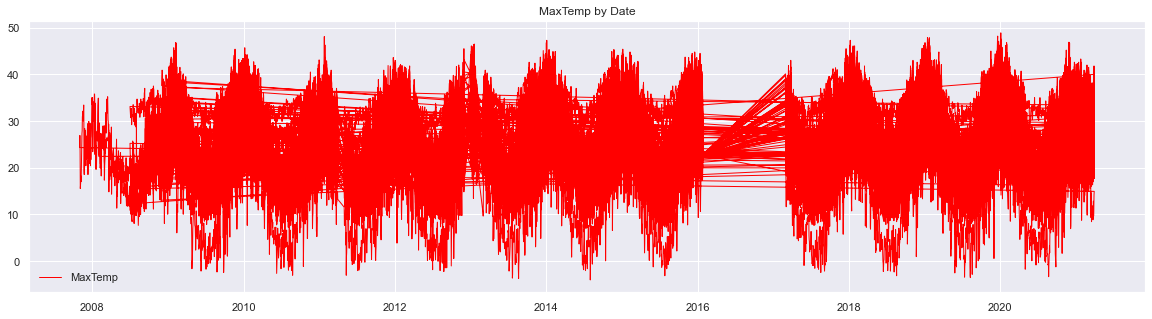

In [19]:

plt.figure(figsize=[20,5])
plt.plot(data['Date'],data['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.title('MaxTemp by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()

#### Finding Minimum Temperature

In [20]:
min_temp = min(data["MinTemp"])
print(f"Minimum temperature ever recorded:{min_temp}")

Minimum temperature ever recorded:-8.7


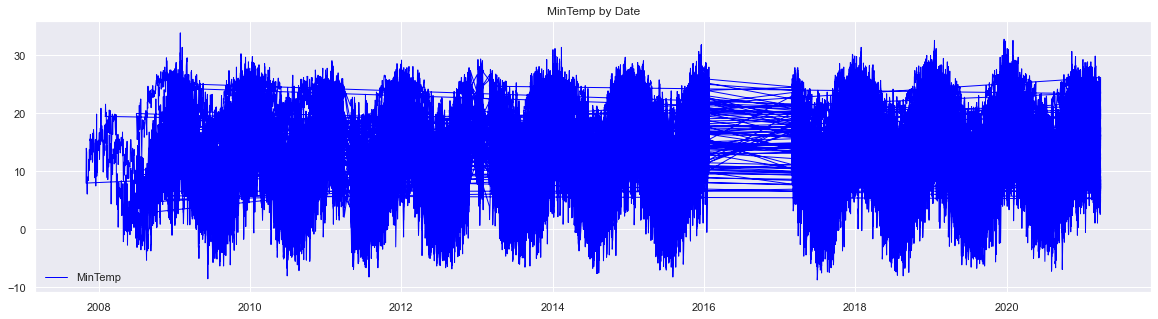

In [21]:
plt.figure(figsize=[20,5])
plt.plot(data['Date'],data['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.title('MinTemp by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()

#### We are limiting our plot for just few years to observer how Max and Min temp varies over every month of year

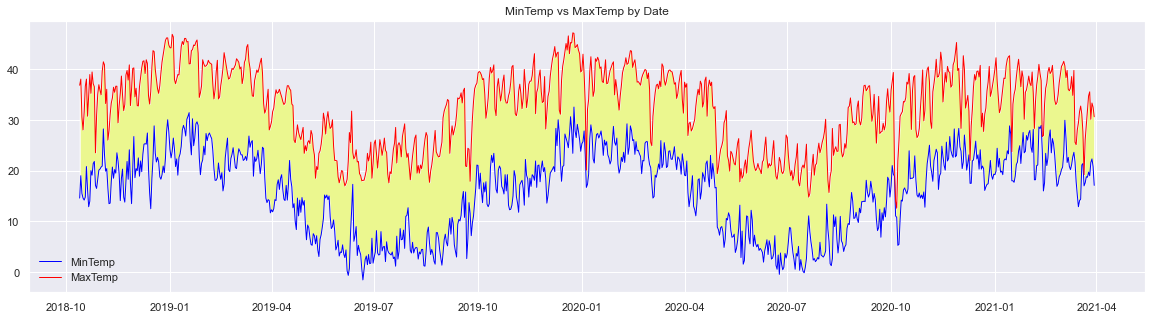

In [22]:
df_dateplot = data.iloc[-900:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.plot(df_dateplot['Date'],df_dateplot['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_dateplot['Date'],df_dateplot['MinTemp'],df_dateplot['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()

#### Largest amount of rainfall ever recorded

In [23]:
max_rain = max(data["Rainfall"])
print("Maximum rainfall ever recorded:",max_rain)

Maximum rainfall ever recorded: 474.0


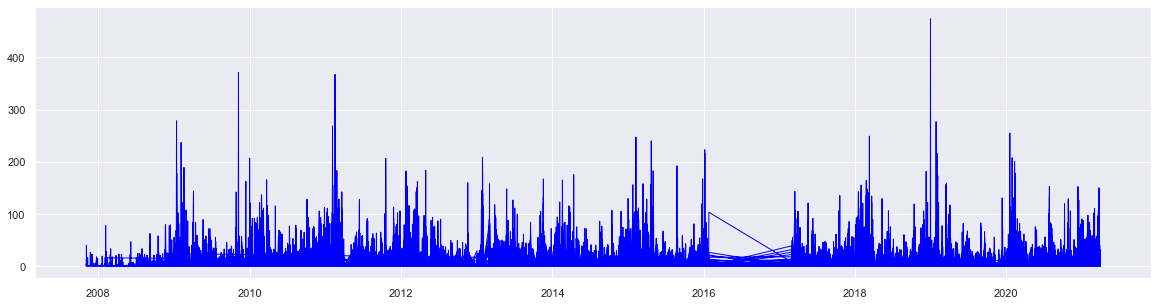

In [24]:
plt.figure(figsize=[20,5])
plt.plot(data['Date'],data['Rainfall'],color='blue',linewidth=1, label= 'MinTemp')

#### We are limiting our plot for just few years to observer how Rain varies over every month of year

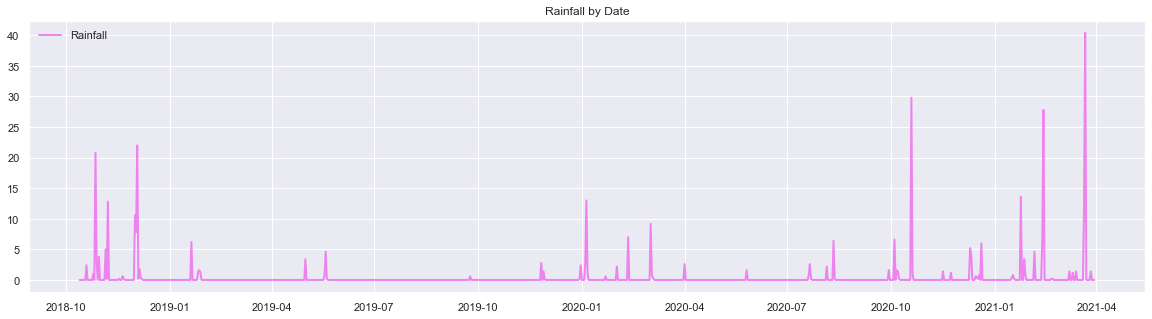

In [25]:
df_dateplot = data.iloc[-900:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Rainfall'],color='violet', linewidth=2, label= 'Rainfall')
plt.legend(loc='upper left', frameon=False)
plt.title('Rainfall by Date')
plt.show()

#### Three consecutive days

In [26]:
idx=[]
for i in range(len(data)-3):
    if data['RainToday'][i]==data['RainToday'][i+1]==data['RainToday'][i+2]:
        idx.append(i)
        idx.append(i+1)
        idx.append(i+2)
print(len(idx))

364479


In [27]:
dfidx=pd.DataFrame(idx,columns=['result'])
result=dfidx.result.unique()
len(result)

159023

In [28]:
test=data.loc[result]
print(test,test.shape)

             Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      2008-12-01   Albury     13.4     22.9       0.6          4.8       8.5   
1      2008-12-02   Albury      7.4     25.1       0.0          4.8       8.5   
2      2008-12-03   Albury     12.9     25.7       0.0          4.8       8.5   
3      2008-12-04   Albury      9.2     28.0       0.0          4.8       8.5   
4      2008-12-05   Albury     17.5     32.3       1.0          4.8       8.5   
...           ...      ...      ...      ...       ...          ...       ...   
192907 2021-03-20    Uluru     21.4     27.6       0.0          4.8       8.5   
192910 2021-03-23    Uluru     18.8     29.0       0.0          4.8       8.5   
192911 2021-03-24    Uluru     18.7     32.1       0.0          4.8       8.5   
192912 2021-03-25    Uluru     19.7     34.7       0.0          4.8       8.5   
192913 2021-03-26    Uluru     19.0     35.5       0.0          4.8       8.5   

       WindGustDir  WindGus

In [29]:
rain3day=test[test['RainToday']=='Yes']['Date']
print(rain3day)

11       2008-12-12
12       2008-12-13
13       2008-12-14
102      2009-03-13
103      2009-03-14
            ...    
192124   2019-01-27
192125   2019-01-28
192466   2020-01-04
192467   2020-01-05
192468   2020-01-06
Name: Date, Length: 17721, dtype: datetime64[ns]


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='Rainfall', ylabel='Date'>

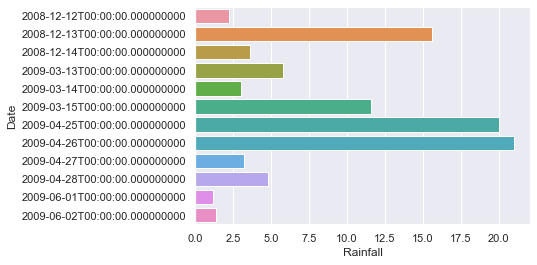

In [31]:
result=test[test['RainToday']=='Yes']
sns.barplot(y=result.Date[:12],x=result.Rainfall[:12])

#### HeatMap

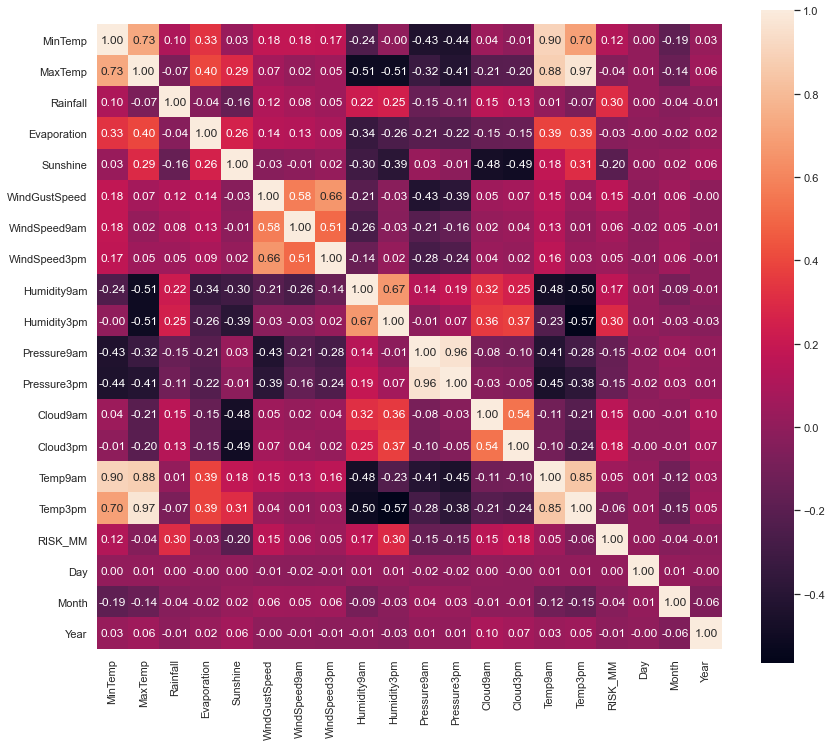

In [32]:
corr = data.corr()
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

#### Distribution Plot of Numerical Data

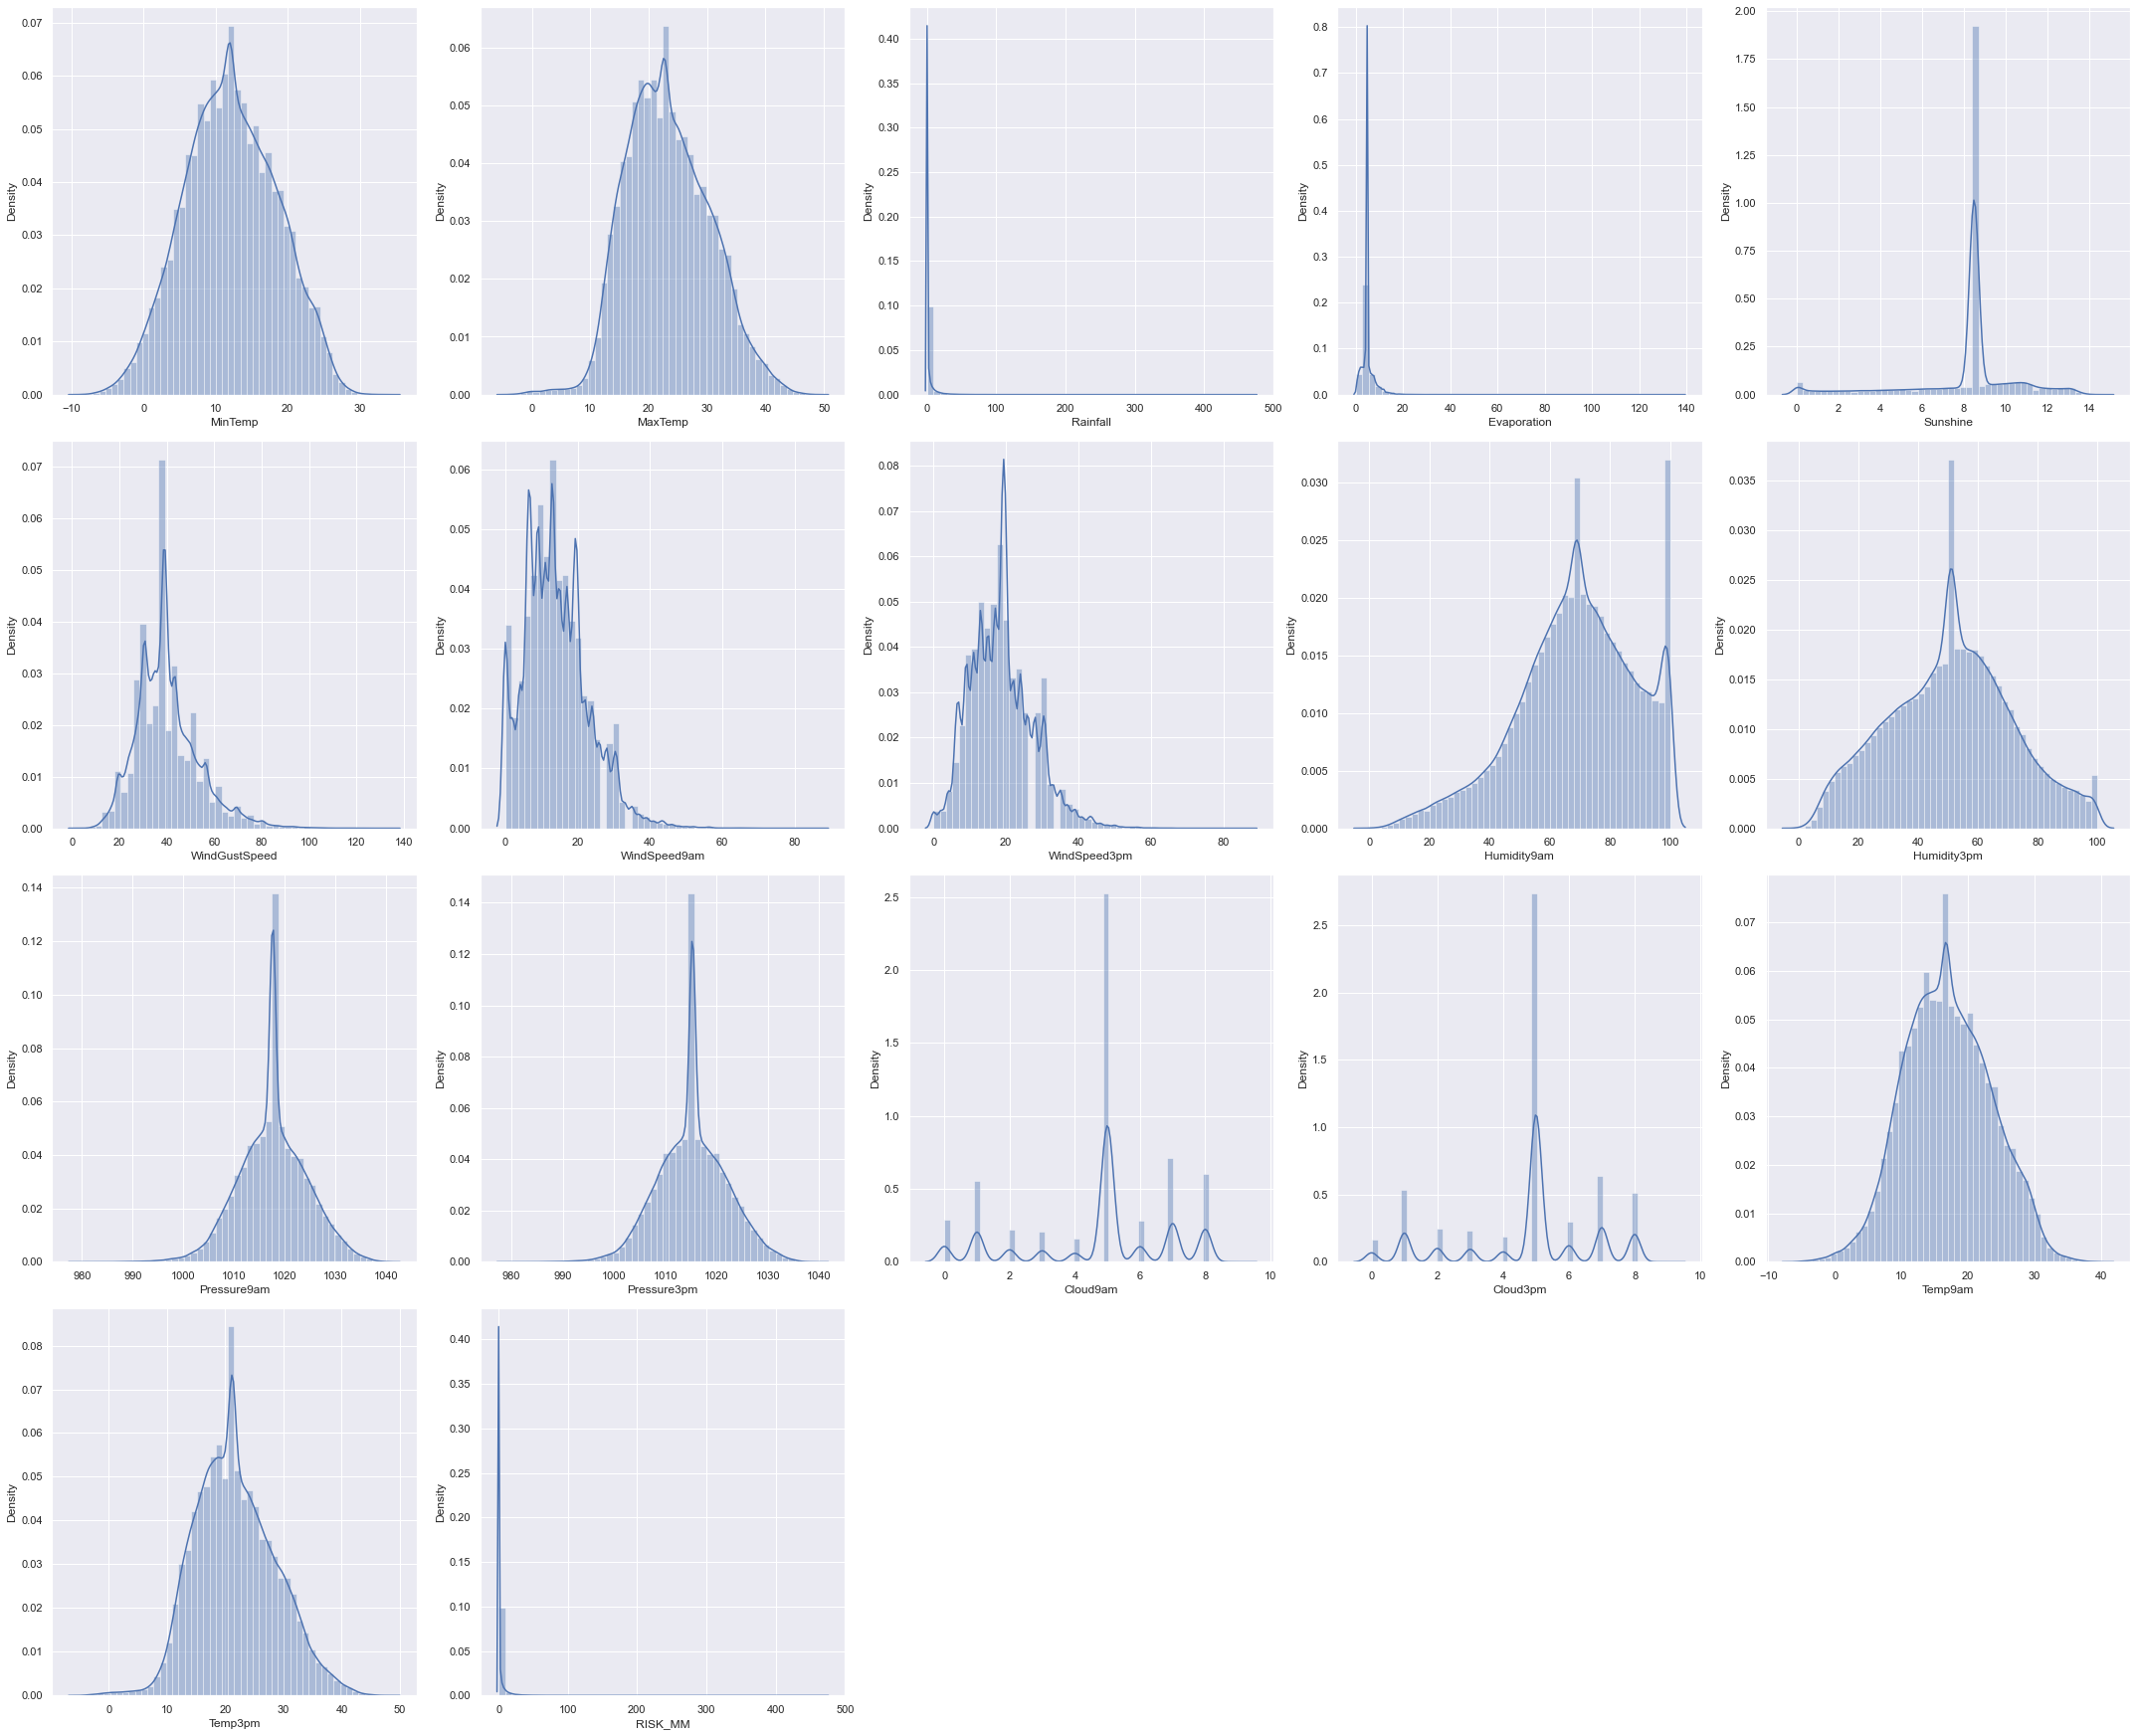

In [33]:
a = 5  
b = 5  
c = 1
fig = plt.figure(figsize=(30,30))
for i in data:
    if data[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.distplot(data[i])
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show()   

#### wind speed

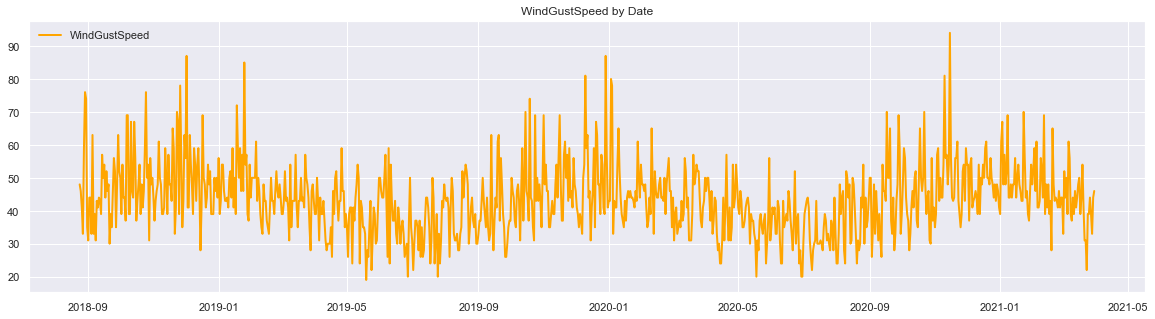

In [34]:
df_dateplot = data.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['WindGustSpeed'],color='orange', linewidth=2, label= 'WindGustSpeed')
plt.legend(loc='upper left', frameon=False)
plt.title('WindGustSpeed by Date')
plt.show()

#### Temp

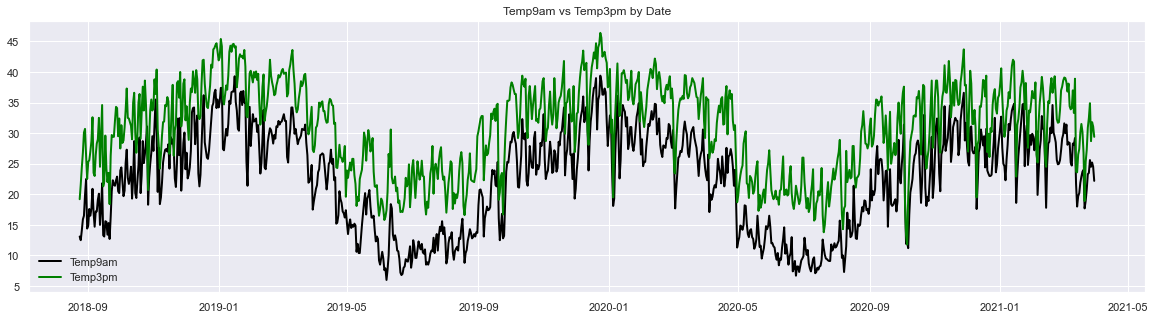

In [35]:
df_dateplot = data.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Temp9am'],color='black', linewidth=2, label= 'Temp9am')
plt.plot(df_dateplot['Date'],df_dateplot['Temp3pm'],color='green', linewidth=2, label= 'Temp3pm')
plt.legend(loc='lower left', frameon=False)
plt.title('Temp9am vs Temp3pm by Date')
plt.show()

#### Identifying outliers and removing them

<AxesSubplot:>

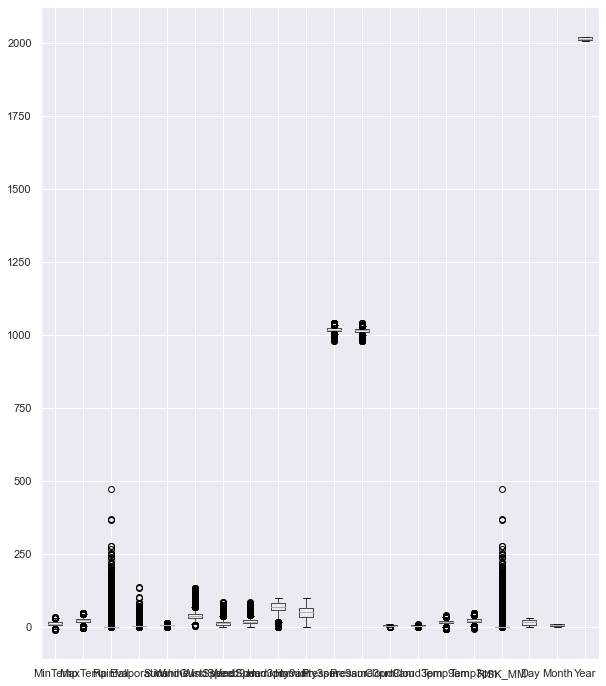

In [36]:
data.boxplot(figsize = (10, 12))

In [37]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [38]:
data['RainToday']

0         0
1         0
2         0
3         0
4         0
         ..
192913    0
192914    1
192915    0
192916    0
192917    0
Name: RainToday, Length: 192918, dtype: int64

#### Removing outliers for all the numeric types

In [39]:
print('Shape of DataFrame before Removing Outliers', data.shape )

Shape of DataFrame before Removing Outliers (192918, 27)


In [40]:
data['Date'] = data['Date'].astype('category').cat.codes
data['Location'] = data['Location'].astype('category').cat.codes
data['WindGustDir'] = data['WindGustDir'].astype('category').cat.codes
data['WindDir9am'] = data['WindDir9am'].astype('category').cat.codes
data['WindDir3pm'] = data['WindDir3pm'].astype('category').cat.codes

In [41]:
data['Date']

0          396
1          397
2          398
3          399
4          400
          ... 
192913    4406
192914    4407
192915    4408
192916    4409
192917    4410
Name: Date, Length: 192918, dtype: int16

In [42]:
from scipy import stats
DF = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [43]:
DF.shape

(175421, 27)

In [44]:
print('Shape of DataFrame after Removing Outliers', DF.shape )

Shape of DataFrame after Removing Outliers (175421, 27)


In [45]:
target=DF['RainTomorrow']

In [46]:
target

0         0
1         0
2         0
3         0
4         0
         ..
192913    1
192914    0
192915    0
192916    0
192917    0
Name: RainTomorrow, Length: 175421, dtype: int64

In [47]:
feed=DF[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]

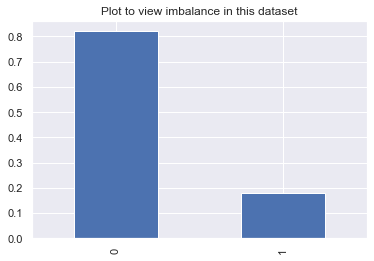

In [48]:
target.value_counts(normalize = True).plot(kind='bar')
plt.title('Plot to view imbalance in this dataset')
plt.show()

In [49]:
feed

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.9,0.6,4.8,8.5,13,44.0,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0
1,2,7.4,25.1,0.0,4.8,8.5,14,44.0,6,15,...,22.0,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0
2,2,12.9,25.7,0.0,4.8,8.5,15,46.0,13,15,...,26.0,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0
3,2,9.2,28.0,0.0,4.8,8.5,4,24.0,9,0,...,9.0,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0
4,2,17.5,32.3,1.0,4.8,8.5,13,41.0,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192913,41,19.0,35.5,0.0,4.8,8.5,12,44.0,14,13,...,17.0,48.0,24.0,1010.9,1007.7,5.0,8.0,25.6,34.9,0
192914,41,21.6,30.1,1.4,4.8,8.5,8,39.0,1,10,...,19.0,63.0,43.0,1012.8,1011.4,8.0,7.0,24.5,28.7,1
192915,41,22.3,33.3,0.0,4.8,8.5,0,33.0,2,9,...,11.0,63.0,29.0,1016.5,1012.2,8.0,5.0,25.2,31.8,0
192916,41,20.8,32.5,0.0,4.8,8.5,9,44.0,2,10,...,24.0,43.0,22.0,1018.4,1014.2,5.0,5.0,24.5,31.1,0


In [50]:
from imblearn.over_sampling import SMOTE
sample = SMOTE()
feed, target = sample.fit_resample(feed, target)

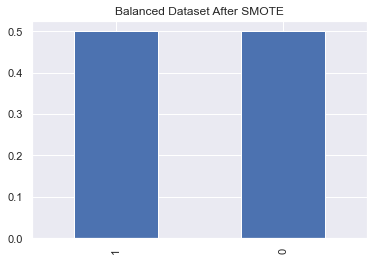

In [51]:
target.value_counts(normalize = True).plot(kind='bar')
plt.title('Balanced Dataset After SMOTE')
plt.show()

#### Spliting Dataset into test and train

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feed, target, test_size=0.20, random_state=12345)

In [53]:
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import metrics

#### Performing Logisticregression

In [54]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
predicted=model.predict(X_test)
accLR = accuracy_score(y_test, predicted)*100
conf = confusion_matrix(y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print(conf)
print("F1 score for logistic regression is :",f1_score(y_test, predicted,)*100, "%")

The accuracy of Logistic Regression is :  76.16518252356403 %
[[22138  6562]
 [ 7169 21740]]
F1 score for logistic regression is : 75.99937075038017 %


#### Performing RandomForest

In [55]:
model = RandomForestRegressor(n_estimators = 100, random_state = 0)  
model.fit(X_train, y_train)  
predicted = model.predict(X_test)
accRF=accuracy_score(y_test, predicted.round())*100
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")

The accuracy of Random Forest is :  91.62978006908644 %


#### xgbc classifier

In [56]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(X_train,y_train)
predicted = xgbc.predict(X_test)
accXG=accuracy_score(y_test, predicted)*100
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(y_test, predicted,)*100, "%")

[18:51:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The accuracy of Logistic Regression is :  91.65408182749223 %

F1 score for XGBoost is : 91.38968481375358 %


#### KNN classifier

In [57]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accKNN=metrics.accuracy_score(y_test, y_pred)*100
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
z = confusion_matrix(y_test, y_pred)
print('\n\n Confusion matrix\n\n', z)

Accuracy: 0.8644309048933326


 Confusion matrix

 [[21521  7179]
 [  631 28278]]


Text(0, 0.5, 'Accuracy')

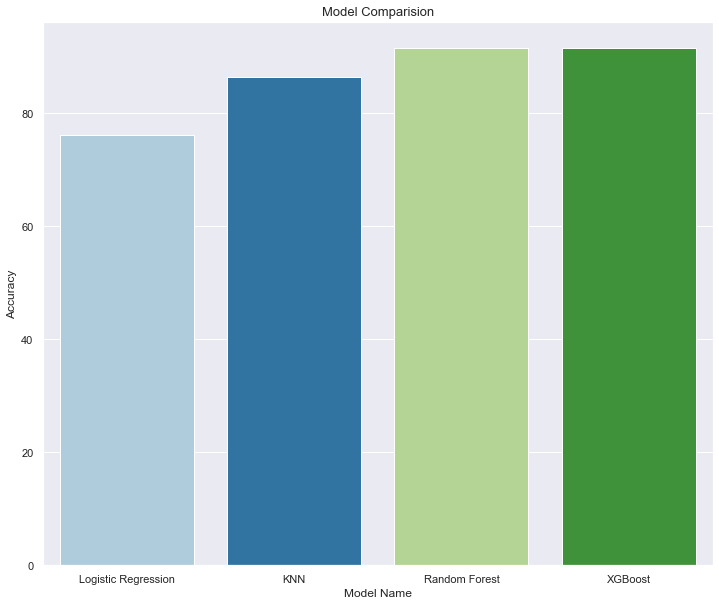

In [58]:
accuracy_scores = [accLR, accKNN, accRF, accXG]
model_name = ['Logistic Regression','KNN','Random Forest','XGBoost']

plt.subplots(figsize=(12,10))
sns.barplot(model_name, accuracy_scores, palette='Paired')
plt.title("Model Comparision",fontsize=13)
plt.xlabel("Model Name")
plt.ylabel("Accuracy")